In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

In [2]:
import emnist
from emnist import list_datasets
print(list_datasets())

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']


In [3]:
emnist.ensure_cached_data()

'C:\\Users\\Rakesh/.cache/emnist/emnist.zip'

In [4]:
from emnist import extract_training_samples
train_images, train_labels = extract_training_samples('letters')
print(train_images.shape)
print(train_labels[0])

(124800, 28, 28)
23


In [5]:
#Shuffling training images
train_images, train_labels = shuffle(train_images, train_labels)
print(train_labels[0])

23


In [6]:
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples('letters')
print(test_images.shape)
print(test_labels[0])

(20800, 28, 28)
1


In [7]:
#Shuffling test images
test_images, test_labels = shuffle(test_images, test_labels)
print(train_labels[0])

23


In [8]:
train_images = train_images / 255
test_images = test_images / 255
# show_image(train_images[0])
print(type(train_images))

<class 'numpy.ndarray'>


In [9]:
train_images_expanded = np.expand_dims(train_images, axis=3)
test_images_expanded = np.expand_dims(test_images, axis=3)
train_labels_expanded = keras.utils.to_categorical(train_labels)
test_labels_expanded = keras.utils.to_categorical(test_labels)
print(train_images_expanded[0].shape)
print(train_images_expanded.shape)

(28, 28, 1)
(124800, 28, 28, 1)


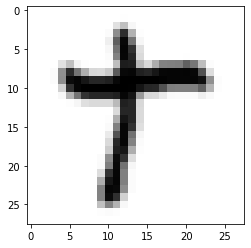

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0.]
20


In [11]:
show_image(train_images[1])
print(train_labels_expanded[1])
print(train_labels[1])

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(27, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
print(test_images_expanded.shape)
print(train_images_expanded.shape)

(20800, 28, 28, 1)
(124800, 28, 28, 1)


In [15]:
model.fit(train_images_expanded, train_labels_expanded, epochs=5, validation_data=(test_images_expanded, test_labels_expanded))

Epoch 1/5
3900/3900 [==============================] - 79s 20ms/step - loss: 2.5623 - accuracy: 0.8039 - val_loss: 2.4645 - val_accuracy: 0.8953
Epoch 2/5
3900/3900 [==============================] - 405s 104ms/step - loss: 2.4723 - accuracy: 0.8877 - val_loss: 2.4578 - val_accuracy: 0.9007
Epoch 3/5
3900/3900 [==============================] - 63s 16ms/step - loss: 2.4588 - accuracy: 0.8997 - val_loss: 2.4399 - val_accuracy: 0.9179
Epoch 4/5
3900/3900 [==============================] - 64s 16ms/step - loss: 2.4519 - accuracy: 0.9065 - val_loss: 2.4399 - val_accuracy: 0.9180
Epoch 5/5
3900/3900 [==============================] - 65s 17ms/step - loss: 2.4473 - accuracy: 0.9108 - val_loss: 2.4341 - val_accuracy: 0.9233


In [16]:
test_loss, test_acc = model.evaluate(test_images_expanded,  test_labels_expanded, verbose=2)

print('\nTest accuracy:', test_acc)

650/650 - 4s - loss: 2.4341 - accuracy: 0.9233

Test accuracy: 0.9232692122459412


In [17]:
print(test_images_expanded[0].shape)

(28, 28, 1)


In [18]:
pred = model.predict(test_images_expanded)

predicte 14
acutal 14


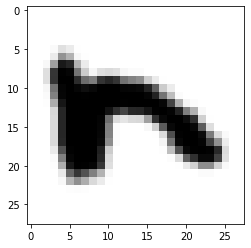

(20800, 28, 28, 1)


In [19]:
temp = 93
print("predicte", np.argmax(pred[temp]))
print('acutal', test_labels[temp])
plt.imshow(test_images[temp], cmap='binary')
plt.show()
print(test_images_expanded.shape)

In [10]:
def show_image(img):
    plt.imshow(img, cmap='binary')
    plt.show()